### Import the relevant libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf

### Data generation  

In [2]:
# Data -> Preprocess -> save in .npz
observations = 1000

xs = np.random.uniform(-10 ,10, size = (observations, 1))
zs = np.random.uniform(-10, 10, size = (observations, 1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1, (observations, 1))

generated_targets = 2*xs - 3*zs + 5 + noise

# Save data into .npz file (n-dimensional numpy array )

np.savez("TF_intro", inputs=generated_inputs, targets = generated_targets)


### Solving with Tensorflow

In [3]:
# Two variables that measures the size of our inputs and outputs
input_size = 2
output_size = 1

### Outlining the model  

In [4]:
# Creation of Tensorflow objects : 
# Feed data --> tf.placeholder 
# Vary --> tf.Variables
# dot product-> tf.matmul

# Creations of two placeholders, where we feed the data
inputs = tf.placeholder(tf.float32, [None, input_size])
targets = tf.placeholder(tf.float32, [None, output_size])
# The None means we need not specify the dimension 

# Varibles : Weights and biases
weights = tf.Variable(tf.random_uniform([input_size,output_size], minval=-0.1, maxval= 0.1))
biases = tf.Variable(tf.random_uniform([output_size], minval=-0.1, maxval=0.1))

# Outputs
outputs = tf.matmul(inputs, weights) + biases

Instructions for updating:
Colocations handled automatically by placer.


### Choosing the objective function and the optimization method

In [5]:
# Define the objective function 
# tf is our library, we need a module that contain loss function: losses is a module that contains most of the commons Loss functionsall
mean_loss = tf.losses.mean_squared_error(labels = targets, predictions = outputs) / 2. 
# The naught after the number 2 is added, so we are certain we'll obtain a float. This is a good programming habits

# The optimization method
optimize = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(mean_loss)

Instructions for updating:
Use tf.cast instead.


### Prepare for execution  

In [6]:
# tf.interactiveSession() is a Tensorflow class that is used whenever we want to execute something, anytime
sess = tf.InteractiveSession()

### Intializing variables

In [7]:
# tf.global_variables_initializer() is a method that initializes all tensor objects "marked" as variables
initializer = tf.global_variables_initializer()
sess.run(initializer) # Running this line of code initialized the variables

### Loading Training Data 

In [8]:
# np.load is a method which loads data from an npz. , .npy, or pickled files into an object 
training_data = np.load("TF_intro.npz")

### Learning

In [9]:
# e stands for epoch : iteration over the full dataset
# for each epoch run the optimize and mean loss operations by filling the place holder objects with data specified in feed_dict parameter
# Since every methode returns something : sess.run(([optimize, mean_loss],) returns something for optimize (returns None) and something for mean_loss(returns value)
# _, to discard the return value of optimize
#print the Loss at each epoch
for e in range(100):
    _,current_loss = sess.run([optimize, mean_loss],
                             feed_dict = {inputs : training_data['inputs'] , targets : training_data['targets']})
    print (current_loss)
    

231.48572
110.54229
55.31979
29.816097
17.796524
11.927832
8.890129
7.1757383
6.0968065
5.337215
4.749917
4.265095
3.8484204
3.482037
3.155851
2.863538
2.6006699
2.3638515
2.150297
1.9576253
1.7837455
1.6268035
1.4851389
1.3572583
1.2418181
1.1376065
1.0435315
0.95860624
0.881941
0.81273144
0.75025356
0.693852
0.6429358
0.59697163
0.55547744
0.51801926
0.48420408
0.45367745
0.42611992
0.40124232
0.37878457
0.35851076
0.34020838
0.32368633
0.30877125
0.2953069
0.28315172
0.27217883
0.26227316
0.25333086
0.24525835
0.23797068
0.23139203
0.22545308
0.22009175
0.21525183
0.21088275
0.20693842
0.20337768
0.20016333
0.19726159
0.19464202
0.19227731
0.19014245
0.18821533
0.18647559
0.18490513
0.18348731
0.1822074
0.18105203
0.18000898
0.17906736
0.17821734
0.17744999
0.17675722
0.17613184
0.17556736
0.17505774
0.17459765
0.17418243
0.1738075
0.17346902
0.17316346
0.1728876
0.17263865
0.17241386
0.17221089
0.17202774
0.17186236
0.1717131
0.1715783
0.17145672
0.17134683
0.1712477
0.17115818
0.1

In [15]:
# As before, we want to plot the last output vs targets after the training is supposedly over.
# Same notation as above but this time we don't want to train anymore, and we are not interested
# in the loss function value.
# What we want, however, are the outputs. 
# Therefore, instead of the optimize and mean_loss operations, we pass the "outputs" as the only parameter.
out = sess.run([outputs], 
               feed_dict={inputs: training_data['inputs']})
# The model is optimized, so the outputs are calculated based on the last form of the model

In [25]:
type(out[0])

numpy.ndarray

In [26]:
out[0].shape

(1000, 1)

### Plotting the data

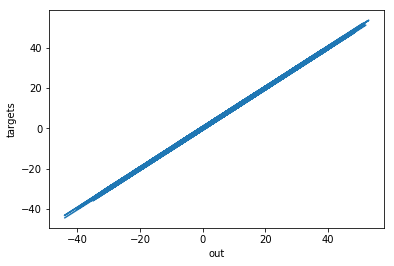

In [29]:
plt.plot(out[0], training_data['targets'])
plt.xlabel('out')
plt.ylabel('targets')
plt.show()